# Projeto Guiado Sem 13

## -Introdução

- Esta base de dados foi retirada do Kaggle e tem informações sobre os acidentes de trânsito nas rodovias federais do Brasil no ano de 2021 e após algumas análises pretendemos perceber alguns elementos para começarmos a pensar no por que de alguns estados terem uma taxa de acidentes muito maior que outros ou porquê pessoas do sexo masculino sofrem muito mais acidentes do que as do sexo feminino.

### Perguntas a serem respondidas.

- Quais são as 10 principais causas dos acidentes no Brasil?
- Qual o rank dos estados pela taxas de acidentes?
- Qual o número de vítimas e média de idade por sexo?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("acidentes2021_todas_causas_tipos.csv", sep= ";", encoding= "latin1")
df

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,331693,739775.0,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Sim,...,Masculino,1,0,0,0,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02
1,331693,739774.0,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Sim,...,Feminino,0,1,0,0,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02
2,331693,738219.0,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Sim,...,Masculino,1,0,0,0,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02
3,331693,739775.0,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Sim,...,Masculino,1,0,0,0,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02
4,331693,739774.0,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Sim,...,Feminino,0,1,0,0,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207137,374224,834254.0,2021-06-13,domingo,02:50:00,SP,116.0,"102,7",PINDAMONHANGABA,Sim,...,Masculino,0,1,0,0,"-22,99497994","-45,48951403",SR-SP,UOP01,DEL08
207138,374224,834253.0,2021-06-13,domingo,02:50:00,SP,116.0,"102,7",PINDAMONHANGABA,Sim,...,Não Informado,0,0,0,0,"-22,99497994","-45,48951403",SR-SP,UOP01,DEL08
207139,374239,834287.0,2021-06-02,quarta-feira,08:45:00,RN,101.0,85,NATAL,Sim,...,Masculino,0,0,1,0,"-5,777664","-35,24937",SR-RN,UOP01,DEL02
207140,374239,834286.0,2021-06-02,quarta-feira,08:45:00,RN,101.0,85,NATAL,Sim,...,Masculino,1,0,0,0,"-5,777664","-35,24937",SR-RN,UOP01,DEL02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207142 entries, 0 to 207141
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      207142 non-null  int64  
 1   pesid                   187477 non-null  float64
 2   data_inversa            207142 non-null  object 
 3   dia_semana              207142 non-null  object 
 4   horario                 207142 non-null  object 
 5   uf                      207142 non-null  object 
 6   br                      206636 non-null  float64
 7   km                      206636 non-null  object 
 8   municipio               207142 non-null  object 
 9   causa_principal         207142 non-null  object 
 10  causa_acidente          207142 non-null  object 
 11  ordem_tipo_acidente     207142 non-null  int64  
 12  tipo_acidente           207142 non-null  object 
 13  classificacao_acidente  207142 non-null  object 
 14  fase_dia            

In [7]:
df.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [8]:
df.describe()

,id,pesid,br,ordem_tipo_acidente,id_veiculo,ano_fabricacao_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos
count,207142.000000,187477.000000,206636.000000,207142.000000,207142.000000,194966.000000,164737.000000,207142.000000,207142.000000,207142.000000,207142.000000
mean,350196.504021,780556.157998,211.408970,1.666128,630021.824512,2010.599915,39.099134,0.350262,0.313548,0.111194,0.044486
std,10400.220596,23399.857532,128.338382,0.983139,19837.568713,7.699259,44.273114,0.477053,0.463936,0.314373,0.206174
min,331693.000000,738204.000000,10.000000,1.000000,595095.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,341354.000000,760761.000000,101.000000,1.000000,613031.000000,2007.000000,27.000000,0.000000,0.000000,0.000000,0.000000
50%,350475.000000,781048.000000,163.000000,1.000000,630502.500000,2012.000000,37.000000,0.000000,0.000000,0.000000,0.000000
75%,359025.000000,800546.000000,324.000000,2.000000,646931.000000,2016.000000,47.000000,1.000000,1.000000,0.000000,0.000000
max,374253.000000,834310.000000,495.000000,11.000000,675980.000000,2021.000000,2020.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.shape

(207142, 37)

In [10]:
df_anls = df[["uf", "causa_acidente", "idade", "sexo"]]
df_anls

,uf,causa_acidente,idade,sexo
0,SC,Ingestão de álcool pelo condutor,35.0,Masculino
1,SC,Ingestão de álcool pelo condutor,22.0,Feminino
2,SC,Ingestão de álcool pelo condutor,27.0,Masculino
3,SC,Ingestão de álcool pelo condutor,35.0,Masculino
4,SC,Ingestão de álcool pelo condutor,22.0,Feminino
...,...,...,...,...
207137,SP,Reação tardia ou ineficiente do condutor,40.0,Masculino
207138,SP,Reação tardia ou ineficiente do condutor,NaN,Não Informado
207139,RN,Velocidade Incompatível,NaN,Masculino
207140,RN,Velocidade Incompatível,45.0,Masculino


In [11]:
df_anls.dropna(subset=["causa_acidente", "sexo", "idade"])

,uf,causa_acidente,idade,sexo
0,SC,Ingestão de álcool pelo condutor,35.0,Masculino
1,SC,Ingestão de álcool pelo condutor,22.0,Feminino
2,SC,Ingestão de álcool pelo condutor,27.0,Masculino
3,SC,Ingestão de álcool pelo condutor,35.0,Masculino
4,SC,Ingestão de álcool pelo condutor,22.0,Feminino
...,...,...,...,...
207135,PR,Velocidade Incompatível,28.0,Masculino
207136,PR,Velocidade Incompatível,29.0,Masculino
207137,SP,Reação tardia ou ineficiente do condutor,40.0,Masculino
207140,RN,Velocidade Incompatível,45.0,Masculino


In [ ]:
df_anls.dropna(inplace=True)

In [13]:
df_anls.shape

(164737, 4)

### Qual são as 10 principais causas dos acidentes no Brasil?

causa_acidente
Velocidade Incompatível                                      21117
Reação tardia ou ineficiente do condutor                     17736
Condutor deixou de manter distância do veículo da frente     14020
Ausência de reação do condutor                               11163
Acessar a via sem observar a presença dos outros veículos    10839
Manobra de mudança de faixa                                   9670
Ingestão de álcool pelo condutor                              9375
Chuva                                                         5432
Ultrapassagem Indevida                                        4913
Transitar na contramão                                        4860
Name: count, dtype: int64

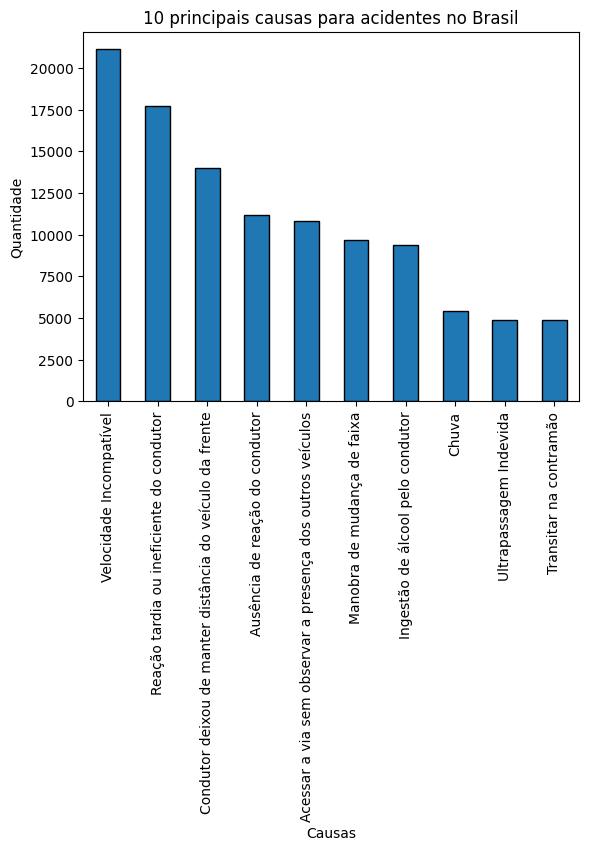

In [14]:
lista_causa_acidente = df_anls["causa_acidente"].value_counts(). head(10)
lista_causa_acidente.plot(kind="bar", edgecolor='black');

plt.xlabel("Causas")
plt.ylabel("Quantidade")
plt.title("10 principais causas para acidentes no Brasil")

lista_causa_acidente

### Qual o rank dos estados pela taxas de acidentes?

uf
MG    21646
PR    16004
SC    15006
SP    12424
RS    11430
RJ    10519
GO     9911
BA     9087
MS     5972
PE     5738
MT     5332
RO     5241
PA     4937
ES     4625
PB     4208
CE     3935
PI     3667
MA     3334
DF     2954
RN     2442
TO     1950
SE     1109
AL      891
RR      718
AM      589
AC      588
AP      480
Name: count, dtype: int64

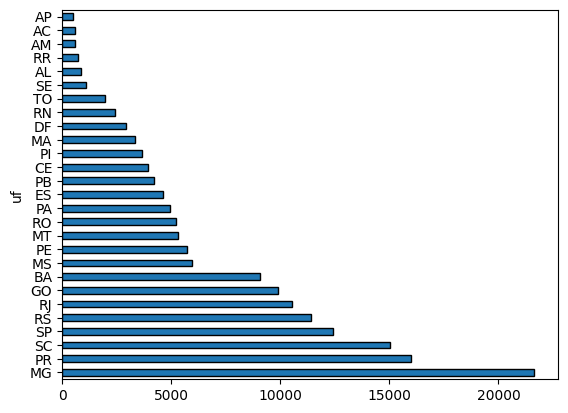

In [15]:
estados_rank = df_anls["uf"].value_counts()
estados_rank.plot.barh(edgecolor="black");

estados_rank

### Qual o número de vítimas e média de idade por sexo?

sexo
Masculino    126509
Feminino      38217
Ignorado         11
Name: count, dtype: int64

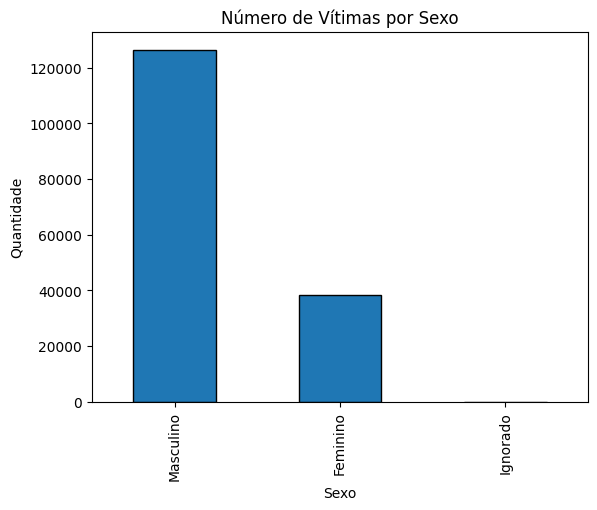

In [15]:
contagem_sexo = df_anls["sexo"].value_counts()
contagem_sexo.plot.bar(edgecolor='black');

plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.title("Número de Vítimas por Sexo")

contagem_sexo

In [22]:
idade_sexo = df_anls.groupby("sexo")["idade"].mean()
idade_sexo

sexo
Feminino     37.139571
Ignorado     26.909091
Masculino    39.692156
Name: idade, dtype: float64

In [18]:
#uf_sexo_idade = df_anls.loc[:, ["uf", "sexo", "idade"]]
#uf_sexo_idade

,uf,sexo,idade
0,SC,Masculino,35.0
1,SC,Feminino,22.0
2,SC,Masculino,27.0
3,SC,Masculino,35.0
4,SC,Feminino,22.0
...,...,...,...
207135,PR,Masculino,28.0
207136,PR,Masculino,29.0
207137,SP,Masculino,40.0
207140,RN,Masculino,45.0


## Conclusão
Após algumas análises em busca de responder os questionamentos sobre o banco de dados, podemos perceber que a região norte obteve o menor indice e a região sudeste o maior, com o Amapá sendo o estado com a menor quantidade de acidentes (480) e Minas Gerais com a maior (21.646).
A principal causa desses acidentes foi a velocidade incompatível com a rodovia, com um número total de 21.117 e a quantidade de pessoas do sexo masculino envolvidas em acidentes é 3 vezes maior do que a de pessoas do sexo feminino, com uma média de idade de 39 e 37 anos respectivamente.